In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
df=pd.read_csv('spam.csv',encoding_errors='ignore')
df.sample(5)


v1                                                 v2 Unnamed: 2  \
4192  ham                            Ok i'm coming home now.        NaN   
933   ham  What time you think you'll have it? Need to kn...        NaN   
2400  ham            Hi! This is Roger from CL. How are you?        NaN   
1585  ham  I was wondering if it would be okay for you to...        NaN   
1343  ham  Crazy ar he's married.  like gd looking guys n...        NaN   

     Unnamed: 3 Unnamed: 4  
4192        NaN        NaN  
933         NaN        NaN  
2400        NaN        NaN  
1585        NaN        NaN  
1343        NaN        NaN

In [2]:

#Data cleaning
# print(df.info())
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
# print(df.sample(3))
# print(df.info())
df.rename(columns={'v1':'tar','v2':'text'},inplace=True)
print(df.sample(5)) 
#check missing values
df.isnull().sum()#no missing values
#check duplicate values
df.duplicated().sum()
df=df.drop_duplicates(keep='first')


      tar                                               text
3363  ham    Yo my trip got postponed, you still stocked up?
5149  ham                       Pls call me da. What happen.
3892  ham                     Have you heard from this week?
3688  ham                          You still coming tonight?
1919  ham  Yar i wanted 2 scold u yest but late already.....


In [3]:

#Exploratory Data Analysis
# print(df['tar'].value_counts())
# plt.pie(df['tar'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
#print(plt.show())
#fetch no.of letters
df['no_char']=df['text'].apply(len)
#ftch no.of words
df['no_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
# print(df.sample(5))
#fetch no.of sentence 
df['no_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
# print(df.sample(5))
# print(df[['no_char','no_words','no_sent']].describe())
#descriptn of ham 
print(df[df['tar']=='ham'][['no_char','no_words','no_sent']].describe())
#descriptn of spam
print(df[df['tar']=='spam'][['no_char','no_words','no_sent']].describe())



           no_char     no_words      no_sent
count  4516.000000  4516.000000  4516.000000
mean     70.344110    17.108946     1.819973
std      56.328803    13.494730     1.383228
min       2.000000     1.000000     1.000000
25%      34.000000     8.000000     1.000000
50%      52.000000    13.000000     1.000000
75%      90.000000    22.000000     2.000000
max     910.000000   220.000000    38.000000
          no_char    no_words     no_sent
count  652.000000  652.000000  652.000000
mean   137.047546   27.668712    2.980061
std     29.937352    7.015283    1.491780
min     13.000000    2.000000    1.000000
25%    130.000000   25.000000    2.000000
50%    148.000000   29.000000    3.000000
75%    156.000000   32.000000    4.000000
max    222.000000   46.000000    9.000000


<Axes: xlabel='no_char', ylabel='Count'>

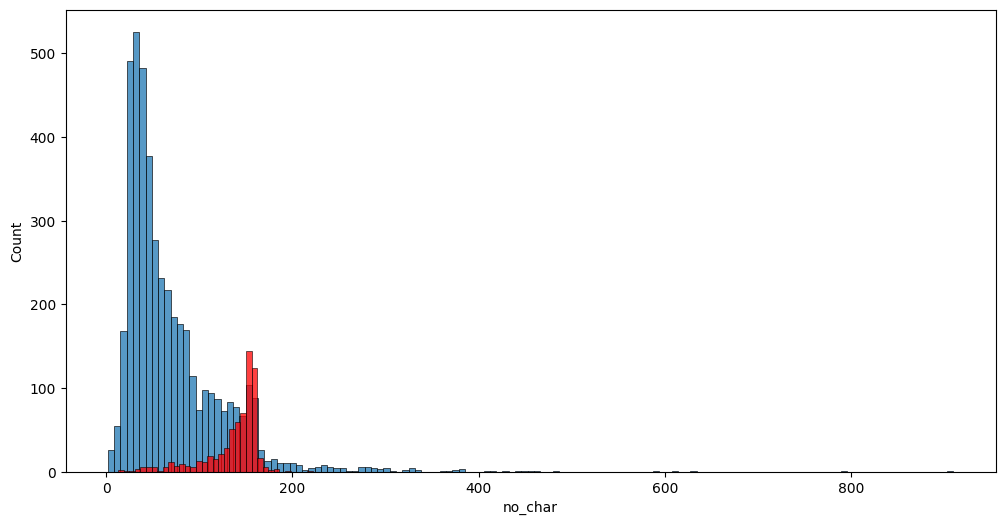

In [4]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['tar']=='ham']['no_char'])
sns.histplot(df[df['tar']=='spam']['no_char'],color='red')

<Axes: xlabel='no_sent', ylabel='Count'>

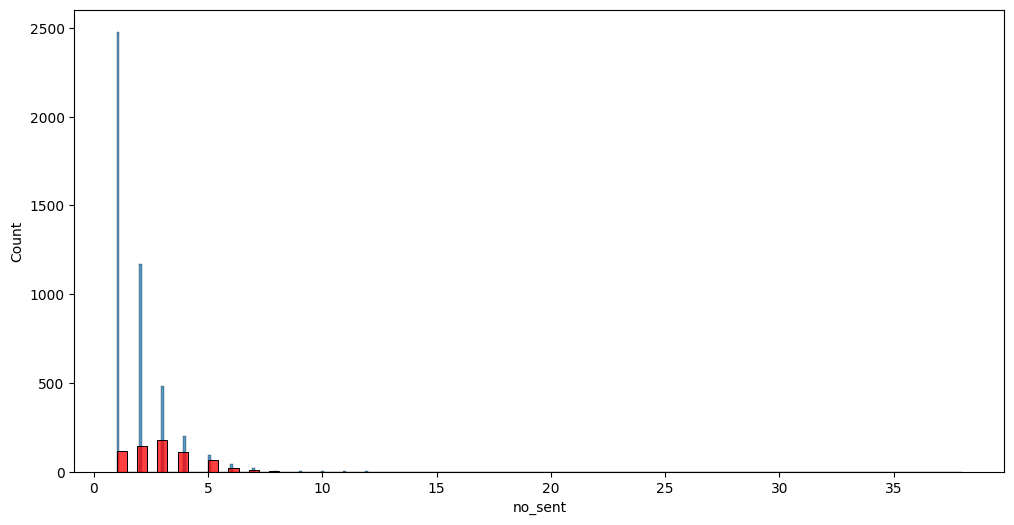

In [5]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['tar']=='ham']['no_sent'])
sns.histplot(df[df['tar']=='spam']['no_sent'],color='red')

<Axes: xlabel='no_words', ylabel='Count'>

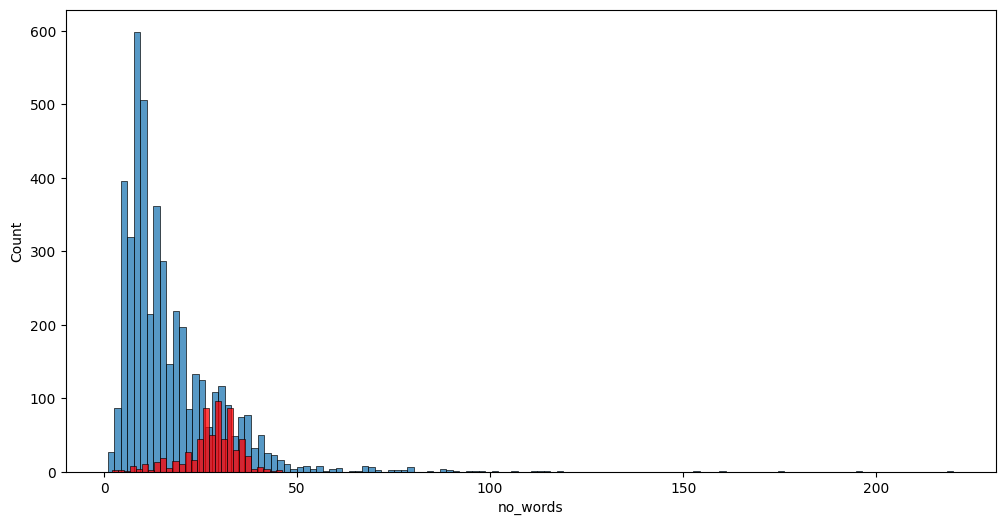

In [6]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['tar']=='ham']['no_words'])
sns.histplot(df[df['tar']=='spam']['no_words'],color='red')

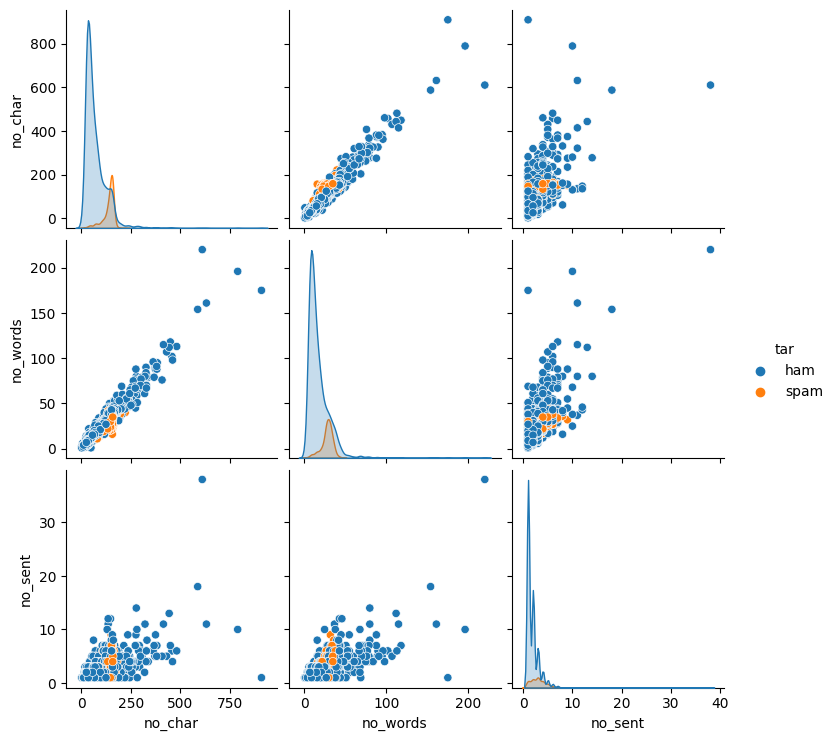

In [7]:
sns.pairplot(df,hue='tar')

In [8]:
df['tar_num']=[1 if x =='spam' else 0 for x in df['tar']]



In [9]:
df

tar                                               text  no_char  \
0      ham  Go until jurong point, crazy.. Available only ...      111   
1      ham                      Ok lar... Joking wif u oni...       29   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...      155   
3      ham  U dun say so early hor... U c already then say...       49   
4      ham  Nah I don't think he goes to usf, he lives aro...       61   
...    ...                                                ...      ...   
5567  spam  This is the 2nd time we have tried 2 contact u...      159   
5568   ham               Will _ b going to esplanade fr home?       36   
5569   ham  Pity, * was in mood for that. So...any other s...       57   
5570   ham  The guy did some bitching but I acted like i'd...      125   
5571   ham                         Rofl. Its true to its name       26   

      no_words  no_sent  tar_num  
0           24        2        0  
1            8        2        0  
2           37        2        1  
3           13        1        0  
4           15        1        0  
...        ...      ...      ...  
5567        35        4        1  
5568         9        1        0  
5569        15        2        0  
5570        27        1        0  
5571         7        2        0  

[5168 rows x 6 columns]

In [10]:
convert_dict = {'tar': object,
                'text': object,
                'no_char': int,
                'no_sent' : int,
                'no_words' : int,
                'tar_num' :int

                }
 
df = df.astype(convert_dict)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5168 entries, 0 to 5571
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tar       5168 non-null   object
 1   text      5168 non-null   object
 2   no_char   5168 non-null   int32 
 3   no_words  5168 non-null   int32 
 4   no_sent   5168 non-null   int32 
 5   tar_num   5168 non-null   int32 
dtypes: int32(4), object(2)
memory usage: 201.9+ KB


In [11]:
df1=df[['tar_num','no_char','no_sent','no_words']]
df1.corr()


tar_num   no_char   no_sent  no_words
tar_num   1.000000  0.381208  0.265786  0.263101
no_char   0.381208  1.000000  0.624425  0.966336
no_sent   0.265786  0.624425  1.000000  0.680239
no_words  0.263101  0.966336  0.680239  1.000000

<Axes: >

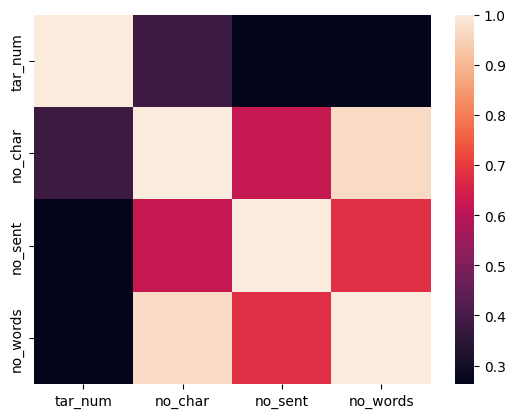

In [12]:
sns.heatmap(df1.corr())

In [13]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)




In [14]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')

'danc'

In [17]:

df['transformed_text']=df['text'].apply(transform_text)

In [18]:
df

tar                                               text  no_char  \
0      ham  Go until jurong point, crazy.. Available only ...      111   
1      ham                      Ok lar... Joking wif u oni...       29   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...      155   
3      ham  U dun say so early hor... U c already then say...       49   
4      ham  Nah I don't think he goes to usf, he lives aro...       61   
...    ...                                                ...      ...   
5567  spam  This is the 2nd time we have tried 2 contact u...      159   
5568   ham               Will _ b going to esplanade fr home?       36   
5569   ham  Pity, * was in mood for that. So...any other s...       57   
5570   ham  The guy did some bitching but I acted like i'd...      125   
5571   ham                         Rofl. Its true to its name       26   

      no_words  no_sent  tar_num  \
0           24        2        0   
1            8        2        0   
2           37        2        1   
3           13        1        0   
4           15        1        0   
...        ...      ...      ...   
5567        35        4        1   
5568         9        1        0   
5569        15        2        0   
5570        27        1        0   
5571         7        2        0   

                                       transformed_text  
0     go jurong point crazi avail bugi n great world...  
1                                 ok lar joke wif u oni  
2     free entri 2 wkli comp win fa cup final tkt 21...  
3                   u dun say earli hor u c alreadi say  
4                  nah think goe usf live around though  
...                                                 ...  
5567  2nd time tri 2 contact u 750 pound prize 2 cla...  
5568                              b go esplanad fr home  
5569                                  piti mood suggest  
5570  guy bitch act like interest buy someth els nex...  
5571                                     rofl true name  

[5168 rows x 7 columns]

In [19]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [20]:
wc_spam=wc.generate(df[df['tar_num']==1]['transformed_text'].str.cat(sep=" "))

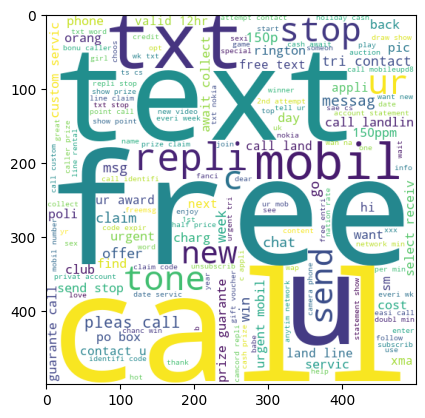

In [21]:
plt.imshow(wc_spam)


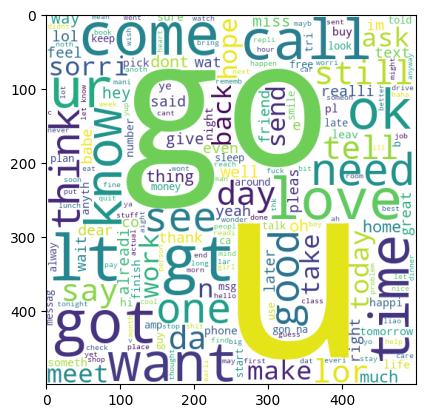

In [22]:
wc_ham=wc.generate(df[df['tar_num']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(wc_ham)

In [23]:
lst1=[]
for i in df[df['tar_num']==1]['transformed_text'].tolist():
    for word in i.split():
        lst1.append(word)
len(lst1)

10106

In [24]:
from collections import Counter
spam_df=pd.DataFrame(Counter(lst1).most_common(30))
spam_df

0    1
0      call  320
1      free  191
2         2  155
3       txt  141
4      text  122
5         u  119
6        ur  119
7     mobil  114
8      stop  104
9     repli  102
10    claim   98
11        4   97
12    prize   82
13      get   74
14      new   64
15   servic   64
16     tone   63
17     send   60
18   urgent   57
19    nokia   57
20  contact   56
21    award   55
22    phone   52
23     cash   51
24    pleas   51
25     week   49
26      win   47
27        c   45
28  collect   45
29      min   45

In [25]:
lst2=[]
for i in df[df['tar_num']==0]['transformed_text'].tolist():
    for word in i.split():
        lst2.append(word)
len(lst2)

35380

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, '2'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'call'),
  Text(11, 0, 'time'),
  Text(12, 0, 'ok'),
  Text(13, 0, 'love'),
  Text(14, 0, 'good'),
  Text(15, 0, 'want'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'need'),
  Text(19, 0, 'one'),
  Text(20, 0, 'lor'),
  Text(21, 0, '4'),
  Text(22, 0, 'home'),
  Text(23, 0, 'think'),
  Text(24, 0, 'see'),
  Text(25, 0, 'take'),
  Text(26, 0, 'still'),
  Text(27, 0, 'da'),
  Text(28, 0, 'tell'),
  Text(29, 0, 'make')])

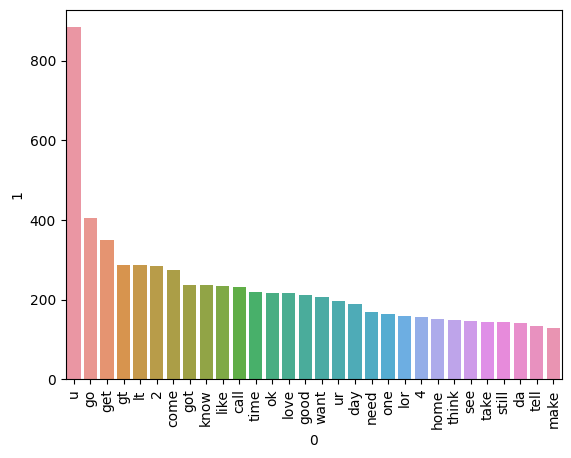

In [26]:
from collections import Counter
ham_df=pd.DataFrame(Counter(lst2).most_common(30))
ham_df
sns.barplot(x=0,y=1,data=ham_df)
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

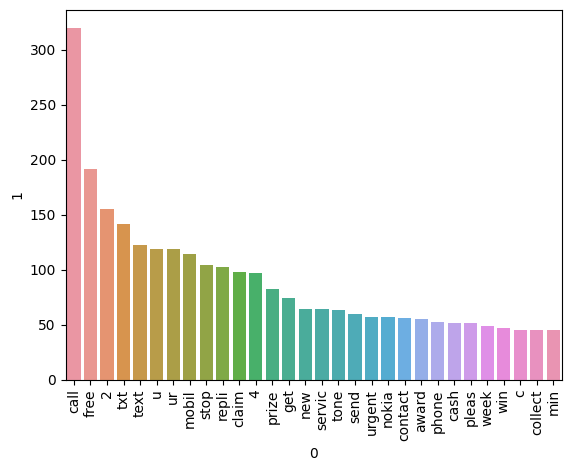

In [27]:
sns.barplot(x=0,y=1,data=spam_df)
plt.xticks(rotation='vertical')

In [28]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
x=cv.fit_transform(df['transformed_text']).toarray()
y=df['tar_num'].values
x.shape

(5168, 6704)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [31]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [32]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [33]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8829787234042553
[[792 101]
 [ 20 121]]
0.545045045045045


In [34]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9632495164410058
[[868  25]
 [ 13 128]]
0.8366013071895425


In [35]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.965183752417795
[[890   3]
 [ 33 108]]
0.972972972972973


In [54]:
tfidf=TfidfVectorizer(max_features=3000)

In [55]:
x1=tfidf.fit_transform(df['transformed_text']).toarray()


In [56]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=2)

In [57]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8752417794970987
[[791 102]
 [ 27 114]]
0.5277777777777778


In [58]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))  
#precision is good

0.9700193423597679
[[893   0]
 [ 31 110]]
1.0


In [59]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9796905222437138
[[892   1]
 [ 20 121]]
0.9918032786885246


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [61]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb

}

In [62]:
def trainclassifier(clf,X_train,Y_train,X_test,Y_test):
    clf.fit(X_train,Y_train)
    Y_pred=clf.predict(X_test)
    accuracy=accuracy_score(Y_test,Y_pred)
    precision=precision_score(Y_test,Y_pred)
    return accuracy,precision

In [63]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
    cur_accuracy,cur_prec=trainclassifier(clf,x_train,y_train,x_test,y_test)
    print(name,":",end="")
    print("Accuracy",cur_accuracy,end="")
    print("Precision",cur_prec)
    accuracy_scores.append(cur_accuracy)
    precision_scores.append(cur_prec)

SVC :Accuracy 0.97678916827853Precision 0.9834710743801653
KN :Accuracy 0.9013539651837524Precision 1.0
NB :Accuracy 0.9700193423597679Precision 1.0
DT :Accuracy 0.9294003868471954Precision 0.8695652173913043
LR :Accuracy 0.9555125725338491Precision 0.9611650485436893
RF :Accuracy 0.9671179883945842Precision 0.9908256880733946
AdaBoost :Accuracy 0.960348162475822Precision 0.9464285714285714
BgC :Accuracy 0.960348162475822Precision 0.8787878787878788
ETC :Accuracy 0.971953578336557Precision 0.9745762711864406
GBDT :Accuracy 0.9477756286266924Precision 0.9393939393939394
xgb :Accuracy 0.9671179883945842Precision 0.9495798319327731


In [64]:
final=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})
final

Algorithm  Accuracy  Precision
0        SVC  0.976789   0.983471
1         KN  0.901354   1.000000
2         NB  0.970019   1.000000
3         DT  0.929400   0.869565
4         LR  0.955513   0.961165
5         RF  0.967118   0.990826
6   AdaBoost  0.960348   0.946429
7        BgC  0.960348   0.878788
8        ETC  0.971954   0.974576
9       GBDT  0.947776   0.939394
10       xgb  0.967118   0.949580

In [65]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))